In [ ]:
%pip install tabulate
dbutils.library.restartPython()
import matplotlib.pyplot as plt

In [ ]:
# Usage of Spark SQL for data transformations
Num_songs_year = spark.sql("""
    SELECT
    year,
    count(artist_name) AS num_songs
    FROM
    prepare_songs_data
    WHERE
    year > 0
    GROUP BY
    year
    ORDER BY
    year DESC
""").toPandas()

Num_songs_year

,year,num_songs
0,2010,686
1,2009,1838
2,2008,2066
3,2007,2526
4,2006,2482
...,...,...
69,1931,4
70,1930,2
71,1929,6
72,1928,4


In [ ]:
# Proper error handling
row = Num_songs_year.count()[1]
if row>0:
    print(f"Data validation passed. {row} rows available.")
else:
    print("No data queried")

Data validation passed. 74 rows available.


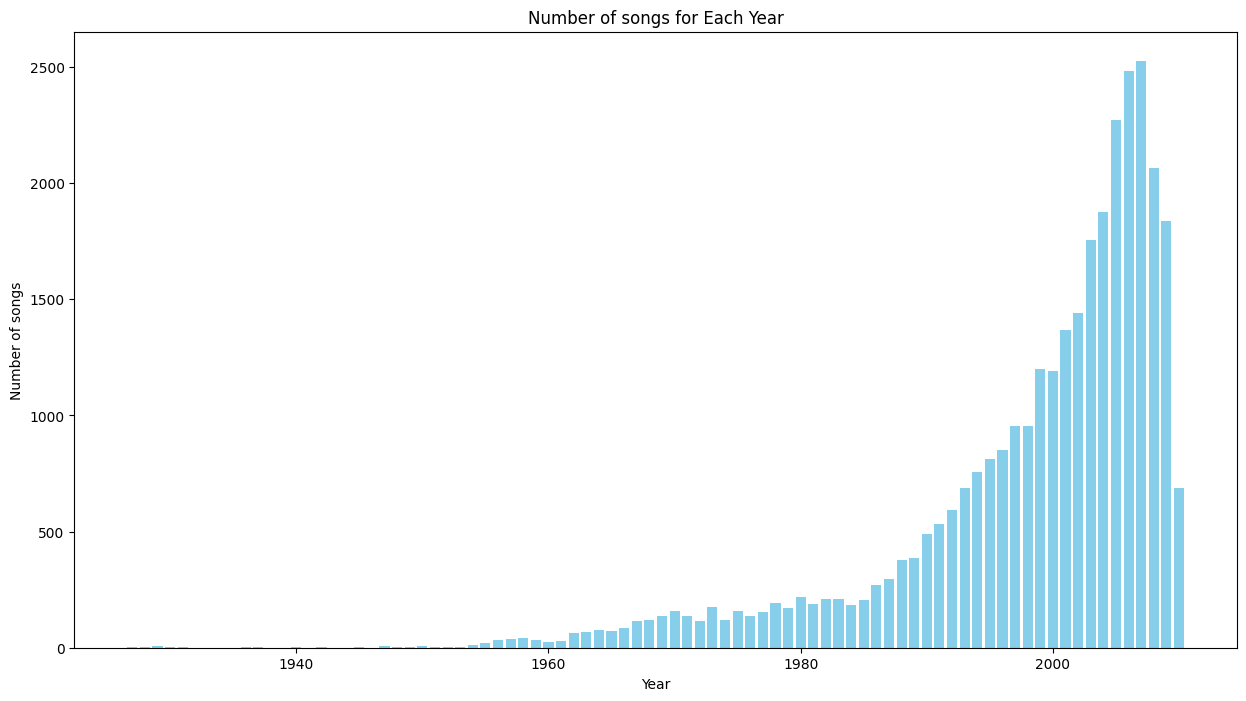

In [ ]:
# Visualization of the transformed data
# Plot a bar plot
plt.figure(figsize=(15, 8))
plt.bar(Num_songs_year["year"], Num_songs_year["num_songs"], color='skyblue')
plt.title("Number of songs for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()


In [ ]:
# Spark SQL Query: Which artists released the most songs each year?
top_artists = spark.sql(
    """
    SELECT
    artist_name,
    count(artist_name)
    AS
    num_songs,
    year
    FROM
    prepare_songs_data
    WHERE
    year > 0
    GROUP BY
    artist_name,
    year
    ORDER BY
    num_songs DESC,
    year DESC
    LIMIT 10
"""
)

In [ ]:
# Spark SQL Query: Find songs for your DJ list
top_DJ = spark.sql(
    """
    SELECT
    artist_name,
    title,
    tempo
    FROM
    prepare_songs_data
    WHERE
    time_signature = 4
    AND
    tempo between 100 and 140
    ORDER BY tempo DESC
    LIMIT 10
"""
)

In [ ]:

from tabulate import tabulate

# Convert top_artists DataFrame to Pandas DataFrame
top_artists_pandas = top_artists.toPandas()

# Convert top_DJ DataFrame to Pandas DataFrame
top_DJ_pandas = top_DJ.toPandas()

# Convert Pandas DataFrame to Markdown format
top_artists_md = tabulate(top_artists_pandas, tablefmt="pipe", headers="keys")
top_DJ_md = tabulate(top_DJ_pandas, tablefmt="pipe", headers="keys")
Num_songs_year_md = tabulate(Num_songs_year, tablefmt="pipe", headers="keys")
# Write to result.md
with open("result.md", "w") as f:
    f.write("# Number of songs for Each Year\n")
    f.write(Num_songs_year_md)
    f.write("\n\n# Top artists\n")
    f.write(top_artists_md)  
    f.write("\n\n# Top DJs\n")
    f.write(top_DJ_md)